# Ejercicios Pair Programming - Módulo 2 Sprint 2
## Lección 3 - Limpieza III
### Natalia García Lago y Noemi Azorín

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto: age, species, country, fatal, year, sex. Si reducimos esto a una tabla para saber que tenemos ya limpito y que no. **Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I ya dejamos algunas columnas limpitas:


age
✔️ esta en formato string cuando debería ser integer y en algunos casos tenemos rangos de edad
species
✔️ es un jaleo! Debemos unificar los nombres y reducir a las especies más importantes
country
✔️ los paises están en mayúsculas, algunos se repiten con algunos cambios
fatal
✔️ la limpiamos en el pair de Pandas V
year
✔️ es una columna de tipo float deberíamos convertirla a integer
sex
✔️ la limpiamos en el pair de Pandas V
fecha
✔️ la limpiamos en el pair de Pandas V

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

In [13]:
ataques = pd.read_csv("../ficheros/ataques_limpiezaII.csv", index_col=0)
ataques.head()

,case_number,year,type,country,activity,age,species_,mes,fatal,sex,especies,edad
0,2018.06.25,2018,Boating,usa,Paddling,57,White shark,Jun,N,F,Tiburón Blanco,57
1,2018.06.03.a,2018,Unprovoked,brazil,Swimming,18,Tiger shark,Jun,Y,M,Tiburón tigre,18
2,2018.05.26.b,2018,Unprovoked,usa,Walking,15,"Bull shark, 6'",May,N,M,Tiburón toro,15
3,2018.05.24,2018,Provoked,australia,Feeding sharks,32,Grey reef shark,May,N,M,Tiburón Gris,32
4,2018.05.13.a,2018,Invalid,england,Fishing,21,Invalid incident,May,N,M,Unspecified,21


1 - ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [14]:
numericas = ataques.select_dtypes(include=np.number)
numericas

,year,edad
0,2018,57
1,2018,18
2,2018,15
3,2018,32
4,2018,21
...,...,...
1667,0,0
1668,0,0
1669,0,0
1670,0,0


- Los outliers se utilizan para detectar datos atípicos dentro de nuestro df. En este caso, nosotros podremos operar con ellos solamente para las variables year y edad.

2 - Identifica visualmente los outliers

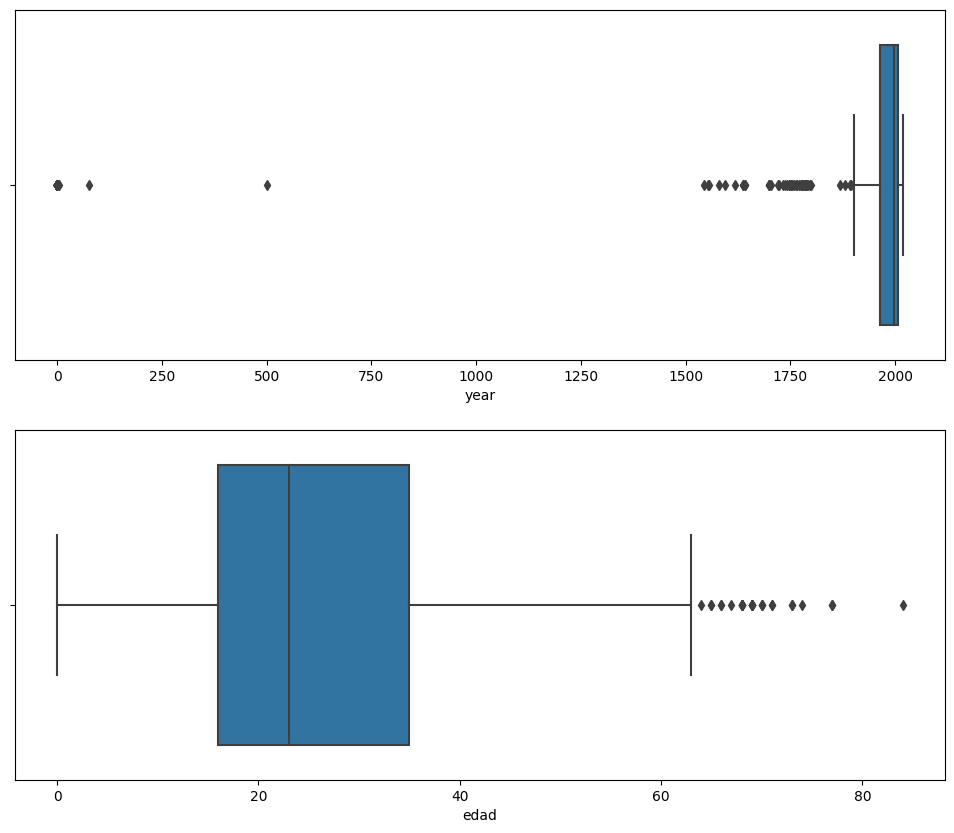

In [16]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

for i in range(len(numericas.columns)):
    sns.boxplot(x=numericas.columns[i], data= ataques, ax= ax[i])

plt.show();

3 - Identifica sobre el dataframe las filas que son outliers

In [17]:
def outliers(list_col, dataframe): 
    
    dicc_ind = {} 
    
  
    for col in list_col:
        
       
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
       
        IQR = Q3 - Q1
        
       
        outlier_sup = 1.5 * IQR
        
        
        outliers_datos = dataframe[(dataframe[col] < Q1 - outlier_sup) | (dataframe[col] > Q3 + outlier_sup)]
        
        
        if outliers_datos.shape[0] > 0: 
        
            dicc_ind[col] = (list(outliers_datos.index)) 
        

    
    return dicc_ind

In [18]:
lista_numericas = list(numericas)
lista_numericas

['year', 'edad']

In [23]:
outliers_dict = outliers(lista_numericas, ataques)
print(outliers_dict)

{'year': [1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 

4 -  Reemplaza los outliers por el estadístico más correcto

- En nuestro caso, optaremos por reemplazar los outliers por la mediana.

In [24]:
for k, v in outliers_dict.items():
    mediana = ataques[k].median() 
    for i in v: 
        ataques.loc[i,k] = mediana 

- Comprobamos visualmente nuestro reemplazo.

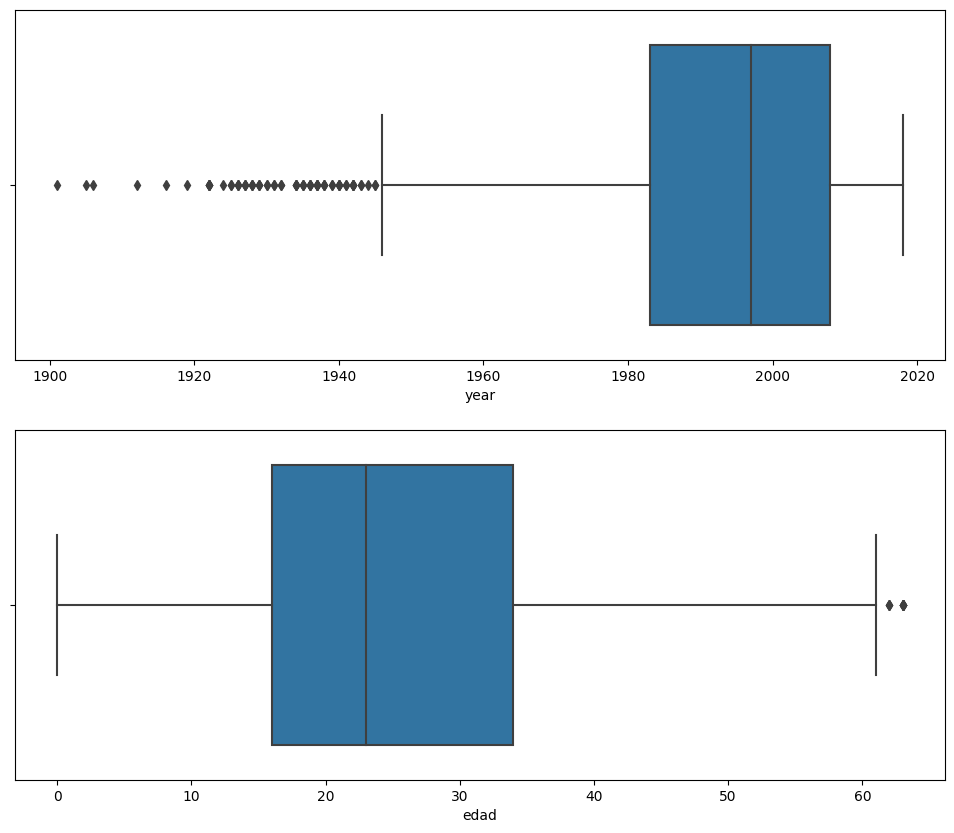

In [26]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

for i in range(len(numericas.columns)):
    sns.boxplot(x=numericas.columns[i], data= ataques, ax= ax[i])

plt.show();

5 -  Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza

In [27]:
ataques.to_csv("../ficheros/ataques_limpiezaIII.csv")